In [1]:
import pandas as pd
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# use seaborn plotting defaults
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Kreditscoring mit realen Daten

Wir nutzen das [German Credit Scoring Dataset](http://www.statistik.lmu.de/service/datenarchiv/kredit/kreditvar_e.html)

In [2]:
data = pd.read_csv('./kredit.asc', sep=' ')

In [3]:
data.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


## Features

In [28]:
data.columns[1:]

Index([u'laufkont', u'laufzeit', u'moral', u'verw', u'hoehe', u'sparkont',
       u'beszeit', u'rate', u'famges', u'buerge', u'wohnzeit', u'verm',
       u'alter', u'weitkred', u'wohn', u'bishkred', u'beruf', u'pers',
       u'telef', u'gastarb'],
      dtype='object')

In [4]:
X = data.ix[:, 1:].values

## Label

Bekommt Kredit oder nicht

In [5]:
y = data['kredit'].values

# Predict Credit worthy or not

Bruteforce some models

In [6]:
# Import some Models to cycle through
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
import time
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
for Model in [KNeighborsClassifier, GaussianNB, RandomForestClassifier, DecisionTreeClassifier, DecisionTreeRegressor]:

    modelname = str(Model).split('.')[-1][:-2]
    #print modelname
    
    t0 = time.time()
    
    clf = Model().fit(X_train, y_train)
    tt = time.time()
    
    y_predict = clf.predict(X_test)
    tp = time.time()
    
    score = accuracy_score(y_predict, y_test)

    print('%.3f Accuracy Score by %s (Fit Time: %.2fs, Predict Time: %.2fs)' % (score, modelname, tt-t0, tp-tt))

0.660 Accuracy Score by KNeighborsClassifier (Fit Time: 0.00s, Predict Time: 0.00s)
0.760 Accuracy Score by GaussianNB (Fit Time: 0.00s, Predict Time: 0.00s)
0.740 Accuracy Score by RandomForestClassifier (Fit Time: 0.02s, Predict Time: 0.00s)
0.720 Accuracy Score by DecisionTreeClassifier (Fit Time: 0.00s, Predict Time: 0.00s)
0.715 Accuracy Score by DecisionTreeRegressor (Fit Time: 0.00s, Predict Time: 0.00s)


## Use Random Forest Classifier

In [13]:
clf = RandomForestClassifier()

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Which feature is important?

In [15]:
importances = clf.feature_importances_
featurenames = data.columns[1:]

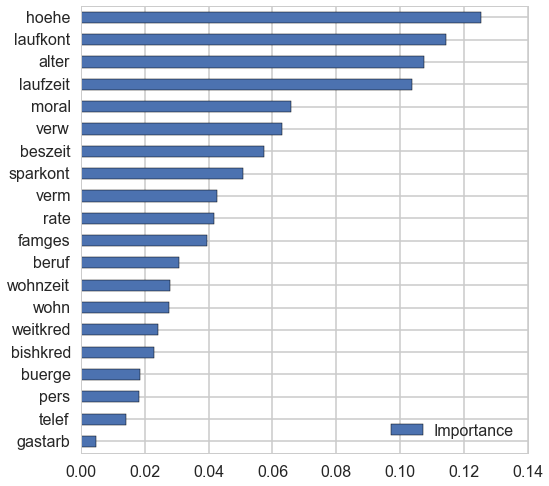

In [16]:
featureimportance = pd.DataFrame(index=featurenames, data=importances, columns=['Importance']).sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8,8))

## Predict with Test Customers

In [17]:
y_predict = clf.predict(X_test)

In [18]:
print('Accuracy Score: %i%%' % (100*accuracy_score(y_predict, y_test)))

Accuracy Score: 70%


# Can we reduce feature count?

In [19]:
pca = PCA(3)

In [20]:
pca.fit(X)

PCA(copy=True, n_components=3, whiten=False)

In [21]:
np.round(pca.explained_variance_ratio_, decimals=3)

array([ 1.,  0.,  0.])

In [22]:
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1000, 20)
(1000, 3)


/Users/paul/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


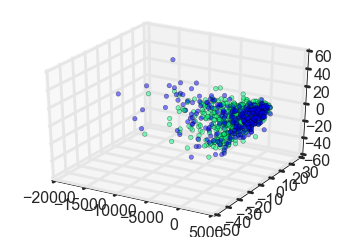

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 2))
#ax.colorbar();
#plt.show()

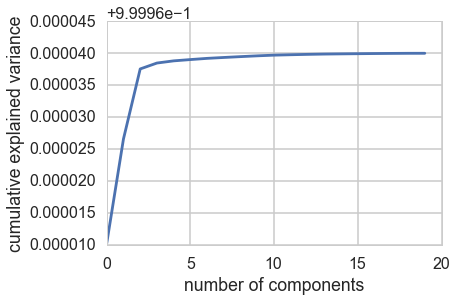

In [24]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Mit 2 Features hätten wir schon 99% der Information